In [1]:
from datetime import time, date

import pandas as pd
import numpy as np

from DataInterface.TrafficDataInterface import CityTrafficData, TrafficType, Service, ServiceType
from DataInterface.GeoDataInterface import GeoData, GeoDataType
from DataInterface.AdminDataInterface import AdminData
from DataInterface.ElectionDataInterface import ElectionData
from DataInterface.WeatherDataInterface import WeatherData
from Utils import City
from FeatureExtraction.SessionDistribution.SessionDistributionCalculator import SessionDistributionCalculator
from FeatureExtraction.SessionDistribution.SessionDistributionAPI import SessionDistributionAPI
from FeatureExtraction.ServiceConsumption.ServiceConsumptionAPI import ServiceConsumptionAPI
from FeatureExtraction.IrisFeatureCalculator import IrisFeatureCalculator
from FeatureExtraction.ServiceConsumptionFeatureCalculator import ServiceConsumptionFeatureCalculator, ServiceConsumptionFeatureName
from FeatureExtraction.ElectionFeatureCalculator import ElectionFeatureCalculator, ElectionFeatureName, Party
from FeatureSelection.Regression import Regression
from FeatureExtraction.Feature import Feature

In [2]:
%autoreload

UsageError: Line magic function `%autoreload` not found.


In [ ]:
%load_ext autoreload
%autoreload 2

# Sleep

In [4]:
geo_data = GeoData()
geo_data.load(GeoDataType.IRIS)

In [5]:
admin_data = AdminData()

In [6]:
session_distribution = SessionDistributionAPI.compute_session_distribution(traffic_data=(CityTrafficData(city=city, geo_data_type=GeoDataType.IRIS, traffic_type=TrafficType.USERS) for city in City))

100%|██████████| 77/77 [00:14<00:00,  5.16it/s]


In [7]:
session_expectation = session_distribution.expectation_by_location()

In [8]:
from Figures.SleepAbstract import SleepAbstractRegressionData, SleepAbstractFigure

In [9]:
reg_data_sleep = SleepAbstractRegressionData(geo_data=geo_data, session_expectation=session_expectation, admin_data=admin_data).get_regression_data()
reg_data_sleep.head()

,Insomnia Index,Density,Amenity Index,Transportation Index,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP75P,DEC_MED19,P19_ACT_DIPLMIN,P19_ACT_SUP2,P19_ACT_SUP5
iris,,,,,,,,,,,,,
060270101,120.244894,9.112167,6.609343,3.271659,-6.540924,-6.360845,-6.449171,-6.592485,-6.603542,9.845329,6.298742,6.226575,6.234607
060270102,123.177206,9.416030,5.872155,3.667551,-6.051748,-5.875767,-6.034697,-6.748738,-7.095525,9.785830,6.740840,6.759480,6.526527
060270103,121.961430,8.462075,5.252603,2.930215,-7.183868,-6.997393,-7.031286,-7.011211,-7.489443,10.028357,5.443550,5.345586,5.631942
060270104,120.954073,7.698805,4.718144,1.552067,-8.021640,-7.703593,-7.836218,-8.008035,-8.151370,10.188666,4.480153,5.095390,5.275687
060270105,120.863642,7.815066,3.634649,1.307371,-7.935939,-7.571138,-7.798253,-7.651596,-7.985955,10.142898,4.755019,5.388621,5.440019


In [11]:
figure_sleep = SleepAbstractFigure(data=reg_data_sleep)
figure_sleep.show(save=True, scatter=False)

In [203]:
from Figures.ElectionsAbstract import CityMap

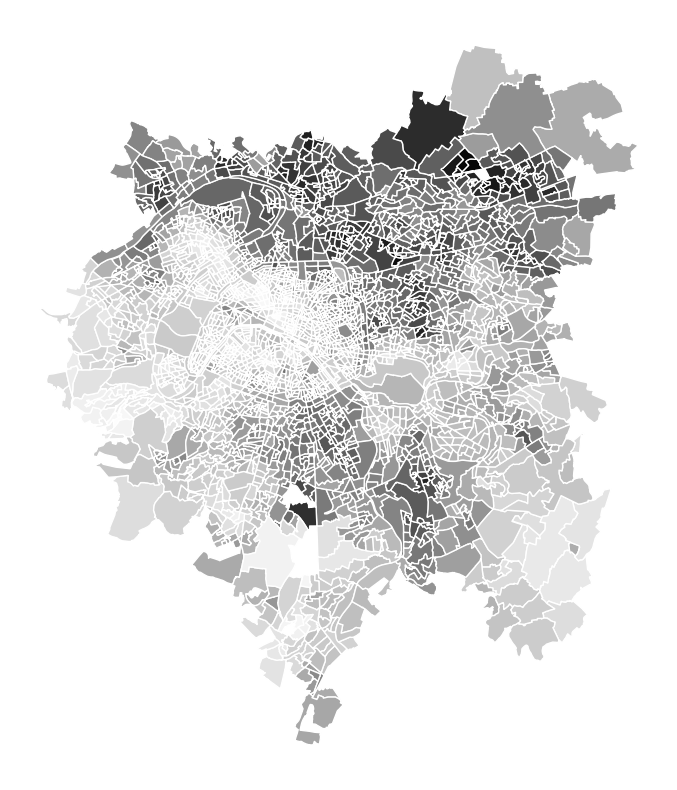

In [204]:
city_map = CityMap(geo_data=geo_data, feature=session_expectation, city=City.PARIS)
city_map.make_map()

In [207]:
720*2

1440

In [99]:
from Figures.ElectionsAbstract import ElectionAbstractFigure, ElectionAbstractRegressionData

In [50]:
election_data = ElectionData()

In [51]:
service_consumption = ServiceConsumptionAPI.compute_service_consumption(traffic_data=(CityTrafficData(city=city, geo_data_type=GeoDataType.IRIS, traffic_type=TrafficType.USERS) for city in City))

100%|██████████| 77/77 [00:13<00:00,  5.66it/s]


In [144]:
reg_data_election = ElectionAbstractRegressionData(geo_data=geo_data, election_data=election_data, service_consumption=service_consumption, admin_data=admin_data).get_regression_data()
reg_data_election.head()

,Facebook,Wikipedia,LinkedIn,Fortnite,Netflix,polarization,turnout,entropy,23,1,5,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP75P,DEC_MED19,P19_ACT_DIPLMIN,P19_ACT_SUP2,P19_ACT_SUP5
iris,,,,,,,,,,,,,,,,,,,,
060270101,-2.062868,-5.590316,-3.675427,-9.309542,-4.459818,-0.545465,-0.697691,0.730450,-1.111748,-3.142301,-1.568456,-6.540924,-6.360845,-6.449171,-6.592485,-6.603542,9.845329,-7.516768,-7.588935,-7.580904
060270102,-2.053933,-5.594131,-3.600489,-9.476669,-4.521172,-0.566716,-0.723235,0.750374,-1.148633,-3.232721,-1.564799,-6.051748,-5.875767,-6.034697,-6.748738,-7.095525,9.785830,-7.074670,-7.056031,-7.288983
060270103,-2.029341,-5.631173,-3.544126,-9.277542,-4.479438,-0.558694,-0.713580,0.745361,-1.134641,-3.197848,-1.566169,-7.183868,-6.997393,-7.031286,-7.011211,-7.489443,10.028357,-8.371961,-8.469924,-8.183569
060270104,-2.002218,-5.799846,-3.365246,-9.163132,-4.375441,-0.553530,-0.689095,0.757687,-1.163295,-3.187619,-1.566354,-8.021640,-7.703593,-7.836218,-8.008035,-8.151370,10.188666,-9.335358,-8.720120,-8.539824
060270105,-2.016121,-5.648359,-3.521882,-9.364730,-4.465331,-0.575602,-0.647696,0.793162,-1.281214,-3.459356,-1.523490,-7.935939,-7.571138,-7.798253,-7.651596,-7.985955,10.142898,-9.060492,-8.426889,-8.375491


In [116]:
reg_data_election.head()

,Facebook,Wikipedia,LinkedIn,Fortnite,Netflix,polarization,turnout,entropy,23,1,5,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP75P,DEC_MED19,P19_ACT_DIPLMIN,P19_ACT_SUP2,P19_ACT_SUP5
iris,,,,,,,,,,,,,,,,,,,,
060270101,-2.062868,-5.590316,-3.675427,-9.309542,-4.459818,-0.545465,-0.697691,0.730450,-1.111748,-3.142301,-1.568456,-6.540924,-6.360845,-6.449171,-6.592485,-6.603542,9.845329,-7.516768,-7.588935,-7.580904
060270102,-2.053933,-5.594131,-3.600489,-9.476669,-4.521172,-0.566716,-0.723235,0.750374,-1.148633,-3.232721,-1.564799,-6.051748,-5.875767,-6.034697,-6.748738,-7.095525,9.785830,-7.074670,-7.056031,-7.288983
060270103,-2.029341,-5.631173,-3.544126,-9.277542,-4.479438,-0.558694,-0.713580,0.745361,-1.134641,-3.197848,-1.566169,-7.183868,-6.997393,-7.031286,-7.011211,-7.489443,10.028357,-8.371961,-8.469924,-8.183569
060270104,-2.002218,-5.799846,-3.365246,-9.163132,-4.375441,-0.553530,-0.689095,0.757687,-1.163295,-3.187619,-1.566354,-8.021640,-7.703593,-7.836218,-8.008035,-8.151370,10.188666,-9.335358,-8.720120,-8.539824
060270105,-2.016121,-5.648359,-3.521882,-9.364730,-4.465331,-0.575602,-0.647696,0.793162,-1.281214,-3.459356,-1.523490,-7.935939,-7.571138,-7.798253,-7.651596,-7.985955,10.142898,-9.060492,-8.426889,-8.375491


In [147]:
figure_election = ElectionAbstractFigure(data=reg_data_election)
fig = figure_election.show(save=True, scatter=True)

In [141]:
from config import FIGURE_PATH
fig.write_html(f'temp/figure_election_heatmap.html')

In [148]:
from Figures.ElectionsAbstract import CityMap

In [154]:
votes_far_right = Feature(name=23, data=reg_data_election[23].to_frame())
facebook_usage = Feature(name='Facebook', data=reg_data_election['Facebook'].to_frame())

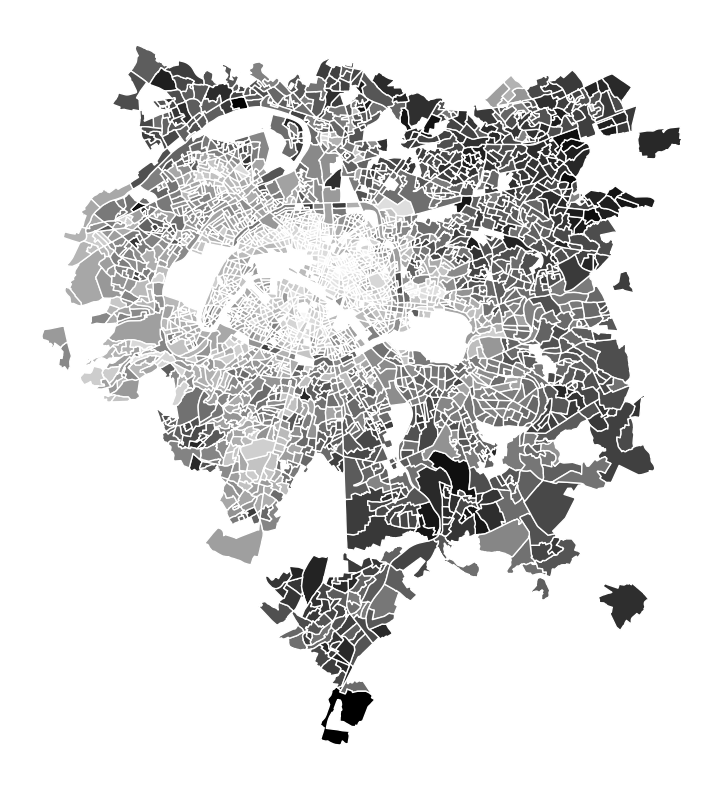

In [160]:
city_map = CityMap(geo_data=geo_data, feature=votes_far_right, city=City.PARIS)
city_map.make_map()

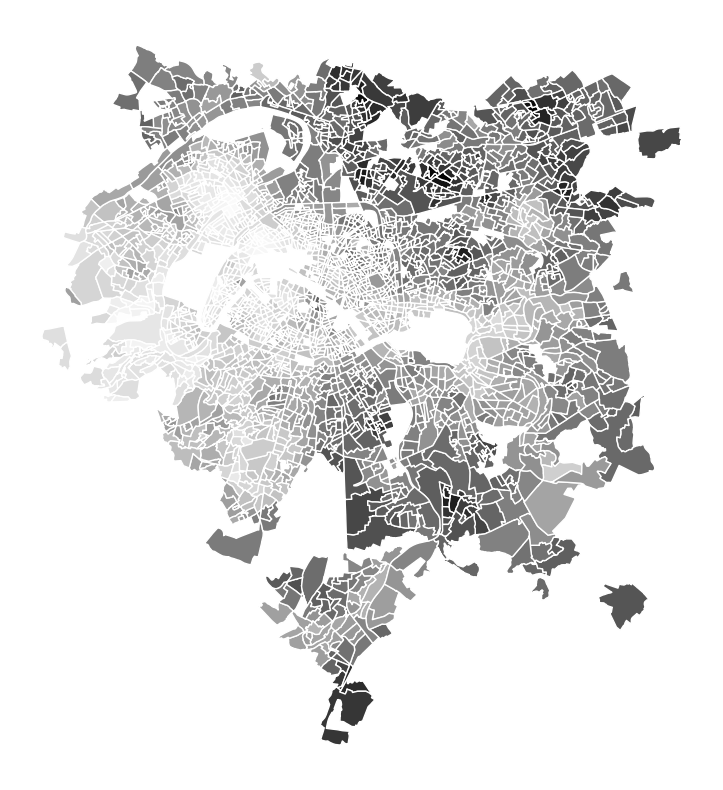

In [161]:
city_map = CityMap(geo_data=geo_data, feature=facebook_usage, city=City.PARIS)
city_map.make_map()

In [162]:
d1 = {'a': 1, 'b': 2}
d2 = {'a': 3, 'b': 4}
d3 = {}

In [163]:
l = [d1, d2, d3]
df = pd.DataFrame(l)

In [168]:
df

,a,b
0,1.0,2.0
1,3.0,4.0
2,NaN,NaN


In [ ]:
df